<a href="https://colab.research.google.com/github/wahyunh10/Demand-Forecasting-Public-Bike-Rental-Project/blob/main/Data_Preprocessing_Outlier_Removal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preprocessing: Outlier Removal using Boxplot Technique**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("bike_rental.csv", index_col='datetime', parse_dates=True)
df.head()

,month,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,rentals
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.shape

(10886, 13)

In [5]:
df.describe()

,month,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,rentals
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,6.521495,11.541613,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,3.444373,6.915838,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4.000000,6.000000,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,7.000000,12.000000,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,10.000000,18.000000,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,12.000000,23.000000,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [6]:
#def  a func called plot_boxplot

def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

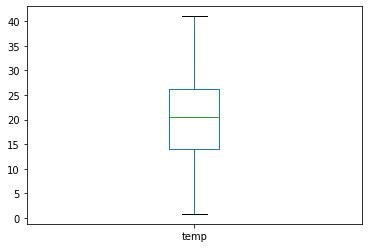

In [7]:
plot_boxplot(df,'temp')

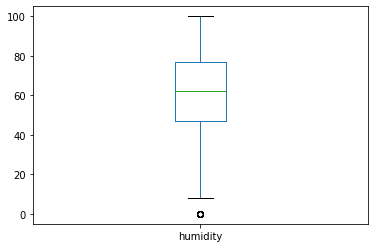

In [8]:
plot_boxplot(df,'humidity')

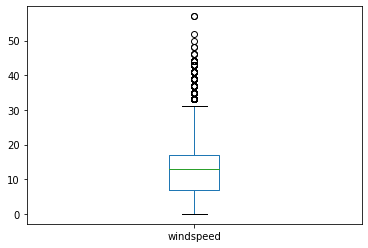

In [9]:
plot_boxplot(df,'windspeed')

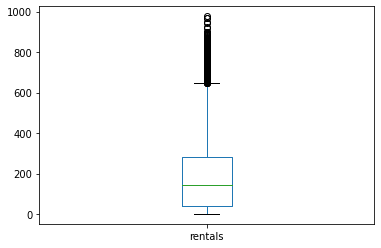

In [10]:
plot_boxplot(df,'rentals')

# **Remove Outliers**

In [11]:
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound) ]
    
    return ls

In [12]:
#cr8 empty list to store the output indices from multiple columns 

index_list = []
for feature in ['temp','humidity','windspeed','rentals']:
    index_list.extend(outliers(df, feature))

In [13]:
index_list

[Timestamp('2011-03-10 00:00:00'),
 Timestamp('2011-03-10 01:00:00'),
 Timestamp('2011-03-10 02:00:00'),
 Timestamp('2011-03-10 05:00:00'),
 Timestamp('2011-03-10 06:00:00'),
 Timestamp('2011-03-10 07:00:00'),
 Timestamp('2011-03-10 08:00:00'),
 Timestamp('2011-03-10 09:00:00'),
 Timestamp('2011-03-10 10:00:00'),
 Timestamp('2011-03-10 11:00:00'),
 Timestamp('2011-03-10 12:00:00'),
 Timestamp('2011-03-10 13:00:00'),
 Timestamp('2011-03-10 14:00:00'),
 Timestamp('2011-03-10 15:00:00'),
 Timestamp('2011-03-10 16:00:00'),
 Timestamp('2011-03-10 17:00:00'),
 Timestamp('2011-03-10 18:00:00'),
 Timestamp('2011-03-10 19:00:00'),
 Timestamp('2011-03-10 20:00:00'),
 Timestamp('2011-03-10 21:00:00'),
 Timestamp('2011-03-10 22:00:00'),
 Timestamp('2011-03-10 23:00:00'),
 Timestamp('2011-01-08 14:00:00'),
 Timestamp('2011-01-08 17:00:00'),
 Timestamp('2011-01-09 09:00:00'),
 Timestamp('2011-01-09 11:00:00'),
 Timestamp('2011-01-12 12:00:00'),
 Timestamp('2011-01-12 18:00:00'),
 Timestamp('2011-02-

In [14]:
# define a func remove which removes outleiers

def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [15]:
df_cleaned = remove(df, index_list)

In [16]:
df_cleaned.shape

(10348, 13)

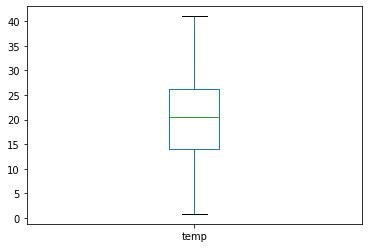

In [17]:
plot_boxplot(df_cleaned,'temp')

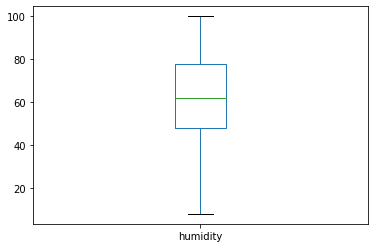

In [18]:
plot_boxplot(df_cleaned,'humidity')

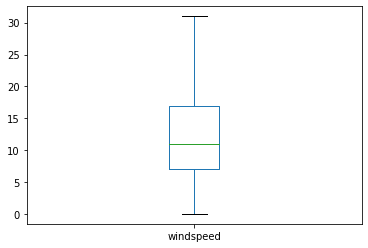

In [19]:
plot_boxplot(df_cleaned,'windspeed')

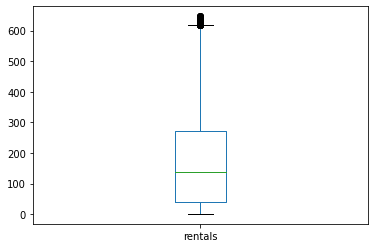

In [20]:
plot_boxplot(df_cleaned,'rentals')

In [21]:
df_cleaned.to_csv('cleandata.csv',header=True)